## Notebook 3- GLM modeling and Regularization. 

Using the dataset in UCO called Crimes and Communities (https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime - it has 128 variables and 1994 rows. Read this file in DIRECTLY from the URL address. Call this as Crime. You will create in Scikit learn at least 4 of these GLMs:
-Ridge Regression
-LASSO Regression
-ElecticNet Regression
-Use one other linear model found in the sci-kit learn documentation.



In [1]:
import urllib
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#pathname = 'C:/Users/email/Downloads/Predictive Modelling Misc/data'

In [2]:
# Retrieving dataset from the web
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

com = pd.read_csv(url, delimiter=',',header = None)#, names = column_names)

#Exporting the csv file : dframe.to_csv(“file_name.csv”)
#com.to_csv('C:/Users/email/OneDrive/Documents/Sandhya/Predictive Modeling/communities.csv',index = None, header=True )
# reading community data
#com = pd.read_csv(pathname + "communities.txt",encoding='ISO-8859-1') 
#df = pd.read_csv(pathname + "community.csv",header = None) 
#df.head()

In [3]:
com.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
com.tail()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19
1993,6,?,?,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


In [5]:
com.shape

(1994, 128)

In [6]:
# collecting all these columns to be drop as 5 of these attributes are not counted as predictive as per the dataset maker
# and  I don't count rest 23 attributes as predictive as to be included in my work.

column_list = list(range(0,5)) +[30]+ list(range(101,118)) + list(range(121,125)) + [126]

In [7]:
# looking at the whole attribut list
column_list

[0,
 1,
 2,
 3,
 4,
 30,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 121,
 122,
 123,
 124,
 126]

In [8]:
# following command works only when I used header=None, if header is left unhandled 
# it raises an error "columns are not on axis=1" 
com=com.drop(column_list, axis= 1)

In [9]:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
#  supplying a list to the set_axis method that is equal in length to the number of columns
# using set_axis with a list and inplace=False
com = com.set_axis(['population','householdsize','racepctblack','racePctWhite',
             'racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban',
             'medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc',
             'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','HispPerCap','NumUnderPov',
            'PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy',
            'PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr',
            'FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par',
            'PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5',
            'PctImmigRec10','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly',
            'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous',
            'PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant',
            'PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone',
            'PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ',
            'MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet',
            'PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LandArea',
             'PopDens',' PctUsePubTrans','LemasPctOfficDrugUn','ViolentCrimesPerPop'], axis='columns', inplace=False)


In [10]:
com.shape

(1994, 100)

In [11]:
# all columnswith their data type in the data frame
com.dtypes

population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
                        ...   
LandArea               float64
PopDens                float64
 PctUsePubTrans        float64
LemasPctOfficDrugUn    float64
ViolentCrimesPerPop    float64
Length: 100, dtype: object

Next is checking any object or categorical variable:

In [12]:
# checking for any categorical variable
obj_df = com.select_dtypes(include=['object']).copy()

# dropping the empty rows at file-end
#obj_df.dropna(how="all", inplace=True) 
obj_df[:3]
# no categorical variable

""
0
1
2


### My data set "communities crimes (com) analysis:
1. Dataset description: The set has 1994 observations with 100 variables. 99 variables are independent variables predicting violent crimes per population.
2. Objective: A supervised learning to learn the relationship between the the independent variables such as "different population for community(native americans,caucasians,hispanic,asian etc.), their respective mean household size, their respective median household income, their respective per capita income, number of people under poverty level, mean persons per houhold etc." and the dependent variable which is the violent crimes per population.

In [13]:
# descriptive statistics for all columns
com.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# showing columns with missing values
nulls = com.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [15]:
# checking any missing value in the dataset
#com.describe()
#com
#com.isnull()
com.isnull().values.any()
# no NaN value

False

In [16]:
#com.info()

In [17]:
# designating target variable name
targetName = 'ViolentCrimesPerPop'
targetSeries = com[targetName]
#remove target from current location and insert in column 0
del com[targetName]
com.insert(0, targetName, targetSeries)
#targetSeries #new target 
#reprint dataframe and see target is in position 0
com.head(10)

,ViolentCrimesPerPop,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.20,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.67,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.43,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.12,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.03,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
5,0.14,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00
6,0.03,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00
7,0.55,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00
8,0.53,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00
9,0.15,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00


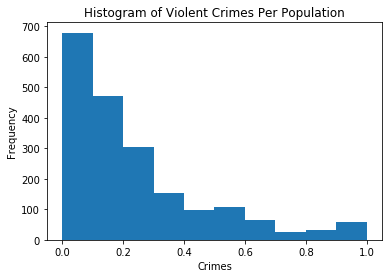

In [18]:
# EDA on target variable
n, bins, patches = plt.hist(com.ViolentCrimesPerPop)#, facecolor='blue', alpha=0.75)
#plt.ylim(0, 15)
plt.xlabel("Crimes")
plt.ylabel("Frequency")
plt.title('Histogram of Violent Crimes Per Population')
plt.show()

In [19]:
com['ViolentCrimesPerPop'].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [20]:
com.columns[1:]

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec10', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'PctRe

In [21]:
# designating features data
com.feature_names = com.columns[1:]
#com.feature_names

In [22]:
# X is representing for independent variables(features) and Y is representing for dependent variable(target)
from sklearn.model_selection import train_test_split
# split dataset into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(
    com.iloc[:,1:].values, com.iloc[:,0].values, test_size=0.3, random_state=3)

In [23]:
# length of the objects
print(len(X_test), len(Y_test),len(X_train),len(Y_train))

599 599 1395 1395


In [24]:
# dimensions of the objects
print(X_train.shape) # observations & features
print(X_test.shape)

print(Y_train.shape) # observations & target
print(Y_test.shape)


(1395, 99)
(599, 99)
(1395,)
(599,)


###  Ridge Regression
So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

In [25]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
# load the diabetes datasets
#dataset = datasets.load_diabetes()
# fit a ridge regression model to the data
model = Ridge(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

Ridge(alpha=0.1)
0.016467265317273074
0.694673691564111


### Lasso Regression
So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (lambda) can be controlled 

In [26]:
# Lasso Regression
# fit a LASSO model to the data
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

Lasso(alpha=0.1)
0.05393333251114451
0.0


### ElasticNet Regression

In [27]:
# ElasticNet Regression
# fit a model to the data
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

ElasticNet(alpha=0.1)
0.05393333251114451
0.0


Estimating Violent Crimes per population using Linear Regression

In [28]:
print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(Y_train), np.min(Y_train), np.mean(Y_train))

1.0 0.0 0.36549914919807397 1.0 0.0 0.24002867383512547


In [29]:
#X_new
X_new[:,0]

NameError: name 'X_new' is not defined

Find the most important features

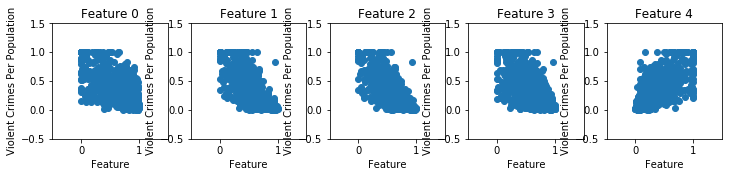

In [30]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,Y_train)
print(zip(fs.get_support(),com.feature_names))
#print(X_new.scores_)
x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = Y_train.min() - .5, Y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Violent Crimes Per Population')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],Y_train)

Normalizing data

In [31]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = StandardScaler().fit_transform((y_train)
X_test = StandardScaler().fit_transform(X_test)
#y_test = StandardScaler().fit_transform(y_test)

print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(Y_train), np.min(Y_train), np.mean(Y_train))

9.870544309124465 -3.7371761824783802 -2.773125770788125e-16 1.0 0.0 0.24002867383512547


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [32]:
from sklearn.model_selection import *
def train_and_evaluate(clf, X_train, Y_train):
    
    clf.fit(X_train, Y_train)
    
    print("Coefficient of determination on training set:",clf.score(X_train, Y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    scores = cross_val_score(clf, X_train, Y_train, cv=5)
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [33]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42, shuffle=False)
print(clf_sgd)
train_and_evaluate(clf_sgd,X_train,Y_train)
print(clf_sgd.coef_)

SGDRegressor(penalty=None, random_state=42, shuffle=False)
Coefficient of determination on training set: 0.6636086698802537
Average coefficient of determination using 5-fold crossvalidation: 0.6024085777739213
[-7.41726707e-03  8.32655286e-03  4.38354767e-02 -3.15087386e-02
 -1.16746640e-02  6.56715259e-03  2.64395075e-03 -1.69508637e-02
 -6.56124640e-04  4.51439624e-03 -5.53794242e-03  1.17596309e-02
  3.48946785e-03 -2.02128552e-02  1.05591206e-02 -1.99458053e-02
  1.15424497e-02  9.70978667e-03 -1.25117825e-02  6.41855790e-03
 -4.29605495e-03 -3.84624521e-03  5.67972154e-05 -6.04498941e-03
  8.58821701e-03  4.77483307e-03  5.87832274e-04 -1.41629493e-02
 -1.81648340e-02  5.37443268e-03 -2.01395096e-03 -1.12721367e-02
  8.16009832e-03 -2.30419714e-03 -1.98749379e-03  6.99690994e-03
 -5.27107705e-03  1.06676336e-02  1.08145239e-02  8.07812612e-04
  3.72797220e-03  8.65362718e-03 -1.96678450e-02 -2.74276735e-02
 -5.37444988e-03 -3.14745038e-03  6.08484857e-03 -2.01176705e-02
 -1.054219

In [34]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,Y_train)

Coefficient of determination on training set: 0.6747670653297044
Average coefficient of determination using 5-fold crossvalidation: 0.6040187153971608


In [35]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,Y_train)

Coefficient of determination on training set: 0.6755209421459021
Average coefficient of determination using 5-fold crossvalidation: 0.6060054142694584


In [36]:
clf_sgd3 = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',  random_state=42)
train_and_evaluate(clf_sgd3,X_train,Y_train)

Coefficient of determination on training set: 0.674953428238415
Average coefficient of determination using 5-fold crossvalidation: 0.6044242112629579


Ridge regression

In [37]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,Y_train)

Coefficient of determination on training set: 0.6951318097684096
Average coefficient of determination using 5-fold crossvalidation: 0.6300629882810096


SVR

In [38]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,Y_train)

Coefficient of determination on training set: 0.6856356496551095
Average coefficient of determination using 5-fold crossvalidation: 0.6190012317502703


In [39]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,Y_train)

Coefficient of determination on training set: 0.8303947613930192
Average coefficient of determination using 5-fold crossvalidation: 0.4243654849962016


In [40]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,Y_train)

Coefficient of determination on training set: 0.8450691127315662
Average coefficient of determination using 5-fold crossvalidation: 0.5759760720086397


In [41]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,Y_train)

Coefficient of determination on training set: 0.7701335036990862
Average coefficient of determination using 5-fold crossvalidation: 0.4599995295662877


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [42]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,Y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.5900193559850933


In [43]:
print(clf_et.feature_importances_,com.feature_names)#com.feature_names

[0.00373895 0.00164552 0.07320613 0.10010708 0.00317847 0.01017006
 0.00220537 0.0036782  0.003056   0.00184703 0.00451503 0.00539363
 0.00373481 0.00483193 0.00496943 0.00442985 0.00212542 0.00540729
 0.00170364 0.00246624 0.00160521 0.00200527 0.00481009 0.00276311
 0.00829664 0.00335543 0.00636082 0.00922849 0.00359134 0.00325601
 0.00337282 0.0034079  0.00408947 0.00535104 0.00483155 0.00355442
 0.00135593 0.01108887 0.00275156 0.0262648  0.0051907  0.00255161
 0.0387222  0.16243934 0.02081965 0.03059217 0.00617953 0.00434388
 0.01294553 0.13492685 0.00333456 0.00425485 0.00438945 0.00364958
 0.00470361 0.00165742 0.00201518 0.0015078  0.00279596 0.00173967
 0.01629419 0.00714638 0.00417971 0.00181475 0.00315513 0.00266298
 0.00381346 0.01253886 0.0064491  0.00198681 0.01107953 0.00776465
 0.00181242 0.00684488 0.00427517 0.00780359 0.00307454 0.00373102
 0.00304107 0.00371345 0.00302659 0.00196703 0.00344763 0.00238094
 0.00350929 0.00454447 0.00389996 0.00481853 0.00456658 0.0084

Finally, evaluate our classifiers on the testing set

In [44]:
from sklearn import metrics
def measure_performance(X,Y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(Y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(Y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(Y,y_pred),"\n")
        
    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(Y,y_pred)),"\n")

        
measure_performance(X_test,Y_test,clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.636 



###        The End: